<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Challenge: A/B Testing Hypothesis Tests

---

### Scenario

You are a data science team working for a web-based company and you are planning to roll out a new website design. One of two competing designs were presented to random samples of users, and their ultimate purchase total was recorded (if any).

Your task is to determine which of the two designs yields higher total purchases and if the result is statistically significant.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline
np.random.seed(42)

In [2]:
## generate some data and randomize

# some people bought nothing, the others bought 
# with some distribution
data1 = [0] * 50
data1.extend(np.random.normal(14, 4, 150))
np.random.shuffle(data1)

# the second design hooked less people, 
# but those that were hooked bought more stuff
data2 = [0] * 100
data2.extend(np.random.normal(20, 5, 100))
np.random.shuffle(data2)

# make a DataFrame
df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head()

,A,B
0,14.685473,25.666710
1,20.152146,0.000000
2,14.274252,18.370134
3,12.122102,26.632519
4,18.228489,25.862179


#### Plot out the distributions of group A and group B.

- Plot a histogram or other graph of ONLY the group A column, and ONLY the group B column.

Text(0.5, 1.0, 'Group A')

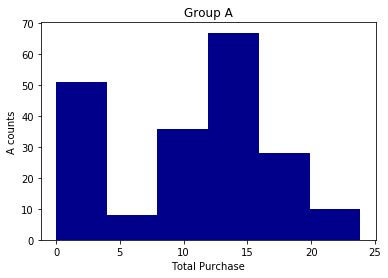

In [3]:
# let's plot the data for group A first
plt.hist(df["A"], bins='scott',  color=['darkblue'])
plt.ylabel("A counts")
plt.xlabel("Total Purchase");
plt.title("Group A")

Text(0.5, 1.0, 'Group A')

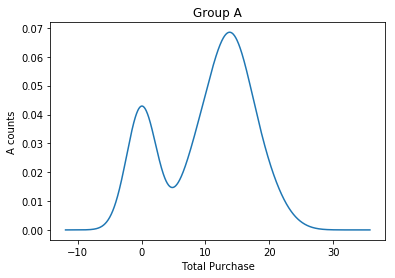

In [4]:
# Create a density plot for group A
df['A'].plot(kind='density');
plt.ylabel("A counts")
plt.xlabel("Total Purchase");
plt.title("Group A")

Text(0.5, 1.0, 'Group B')

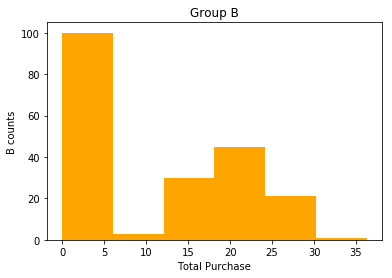

In [5]:
# make the same plot for data set B
plt.hist(df["B"], bins='scott',  color=['orange'])
plt.ylabel("B counts")
plt.xlabel("Total Purchase");
plt.title("Group B")

Text(0.5, 1.0, 'Group B')

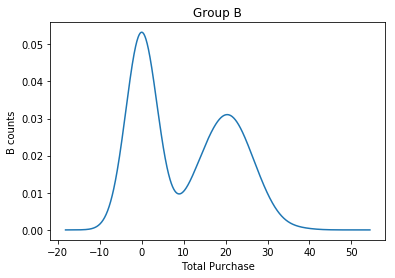

In [6]:
# Create a density plot for group B
df['B'].plot(kind='density');
plt.ylabel("B counts")
plt.xlabel("Total Purchase");
plt.title("Group B")

#### Make a box plot of the two groups

Text(0.5, 1.0, 'Box Plots - Group A & B')

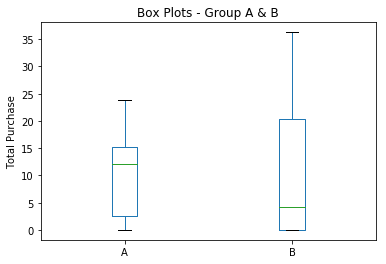

In [7]:
df.plot.box()
plt.ylabel("Total Purchase");
plt.title('Box Plots - Group A & B')

#### Using seaborn - plot the distributions of the graphs together

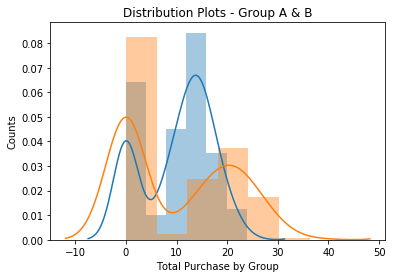

In [10]:
#Put both graphs in this box and seaborne will stack them
sns.distplot(df['A']);
sns.distplot(df['B']);
plt.ylabel("Counts");
plt.xlabel("Total Purchase by Group");
plt.title('Distribution Plots - Group A & B');

#### Are our data sets (approximately) normal? 


###### ANSWER: No


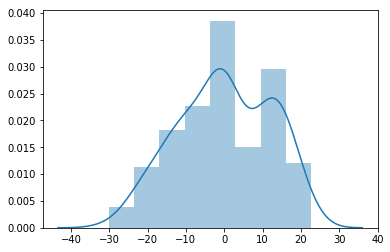

In [11]:
sns.distplot(df['A']-df['B']);


<a id="statistical-tests"></a>
### Statistical Tests

There are a few good statistical tests for A/B testing:
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)
* [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test)
* [Mann-Whitney test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

**Each test makes various assumptions:**
* ANOVA assumes the residuals are normally distributed and data have equal variances.
* The Welch t-test assumes normal distributions but not necessarily equal variances and more effectively accounts for small sample sizes.
* The Mann-Whitney test assumes nothing about the distributions but requires at least 20 data points in each set, producing a weaker p value.

Typically you need to choose the most appropriate test. Tests that make more assumptions are more discriminating (producing stronger p values) but can be misleading with data sets that don't satisfy the assumptions.

In statistics, **one-way analysis of variance** (abbreviated one-way **ANOVA**) is a technique used to compare the means of three or more samples (using the **F distribution**). 

The **ANOVA** tests the *null hypothesis* (the default position that there is no relationship) that samples in two or more groups are drawn from populations with the same mean values. 
- *One-way* ANOVA: tests the difference in population means based on one characteristic or factor.
- *Two-way* ANOVA: tests comparisons between populations based on multiple characteristics.
> - When there are only two means to compare, we use the **t-test**.
> - When testing for differences among at least three groups, the **ANOVA** is used. 

#### Which test is most appropriate for our data?

###### Answer:
Mann-Whitney - due to lack of normal distribution

#### Use the Mann-Whitney test on our data.

- Look up the function in SciPy [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).
- Statistic: Float the Mann-Whitney U statistic — equal to min(U for x, U for y) if alternative is equal to none (deprecated; exists for backward compatibility) — and U for Y otherwise.
- P value: Float p value assuming an asymptotic normal distribution — one sided or two sided, depending on the choice of alternative.

In [ ]:
stats.mannwhitneyu(df['A'], df['B'])

The Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis of whether it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.

Unlike the t-test, it does not require the assumption of normal distributions. It is also nearly as efficient as the t-test on normal distributions.

<a id="interpret-your-results"></a>
### Interpret Your Results
* Compute the total customer spend for each group.
* Is there a significant difference in the mean total purchases in the two designs?
* Which design do you recommend? Why? 
* Write two sentences explaining your results and your recommendation.

In [ ]:
#Was there a large difference in the customer spend?
print(df['A'].sum())
print(df['B'].sum())

###### Answer: Given the lack of significant (pvalue of .4) with small difference in overall spend - I would not update the site


## Testing more than 2 means
Now let's create some new data sets.
- Let's make them rather different from each other...
- ...and normally-distributed

In [ ]:
# some people bought less
data1 = np.random.normal(10, 5, 100)

# some people bought a medium amount
data2 = np.random.normal(20, 5, 100)

# some people bought more
data3 = np.random.normal(30, 5, 100)

# turn into a DataFrame (as we did above)

three_means_df = pd.DataFrame()
three_means_df["A"] = data1
three_means_df["B"] = data2
three_means_df["C"] = data3


three_means_df.head()

#### Are our data sets (approximately) normal? 
- Create a histogram for each group to decide. use Pandas `.hist()`.
- Don't forget to label the axes and add a title

In [ ]:
# plot the data the again
plt.hist(three_means_df["A"], bins='scott', label="A")
plt.hist(three_means_df["B"], bins='scott', label="B")
plt.hist(three_means_df["C"], bins='scott', label="C")
plt.legend()
plt.ylabel("Counts")
plt.xlabel("Total Purchase");


In [ ]:
#sometimes easier to see on seaborne
sns.distplot(three_means_df['A']);
sns.distplot(three_means_df['B']);
sns.distplot(three_means_df['C']);
plt.legend();
plt.ylabel("Counts");
plt.xlabel("Total Purchase");
plt.title("Distribution Plots Groups A, B, C");

In [ ]:
# All appear approximiately normal

#### Are the variances of our variables similar?

In [ ]:
three_means_df.var()

#### Use the one-way ANOVA to test for differences in our data.

- Look up the function in SciPy [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).
- Statistic: (Float) The computed F-value of the test.
- P value: (Float) The associated p-value from the F-distribution.

In [ ]:
# use the one-way ANOVA to test for differences
f, p = stats.f_oneway(three_means_df["A"], three_means_df["B"], three_means_df["C"])

print(f'F-statistic: {f}')
print(f'p-value: {p}')

### Interpret Your Results
* Is there a significant difference in the mean of these three groups?
* Which design do you recommend? Why? 
* Write two sentences explaining your results and your recommendation.

**Answer:**
The difference between these groups is extremely significant.
Before a recommendation can be made regarding invidual groups, however, further analysis will be necessary.
It may be tempting to recommend the third group, with the highest mean sales, but we only established 
these the means differ more than would be expected by chance alone.
In other words, this does not tell the researcher anything about what the effects were, 
just that there most likely were real effects.

## Optional Practice: Acme Shopping

#### Research Question:
Are the spending amounts of men and women different at Acme?

In [ ]:
# Generating Data
np.random.seed(123)
df_m = pd.DataFrame({
    'sex': 'M',
    'amount': np.random.normal(loc=60, scale=3, size=100)
})

df_f = pd.DataFrame({
    'sex': 'F',
    'amount': np.random.normal(loc=70, scale=4, size=100)
})

df = pd.concat([df_m, df_f], axis=0)
df.head()

###### Plot the data for each sex. What do you see?

In [ ]:
df.hist(column='amount', by='sex');

###### Formulate a hypothesis test:

ANSWER: There is no relationship between spending and gender

###### Run a t-test

In [ ]:
# Run a t-test
# assign a boolean index to split the data set
is_m = df['sex'] =='M'
is_f = df['sex'] =='F'

stats.ttest_ind(df[is_m]['amount'], df[is_f]['amount'], equal_var=False)

###### Make a conclusion

In [ ]:
is_m = df['sex'] =='M'
is_f = df['sex'] =='F'
print('On average men spend ',df[is_m]['amount'].mean())
print('On average women spend ',df[is_f]['amount'].mean())

###### ANSWER: 
Given the incredibly small value of p and the difference in spending we can reject the null hypothesis